### 1. Imports

Import libraries and initialize the galstreams library

In [ ]:
import numpy as np
from galstreams import MWStreams
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, Galactocentric
import astropy.units as u

mws = MWStreams()

# Enable interactive plotting in a Jupyter notebook for a rotatable 3D plot
#%matplotlib widget

# enable auto reloading of common submodule
%load_ext autoreload
%autoreload 1
%aimport common 
%aimport clusters_data



Initializing galstreams library from master_log... 


        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use name instead. [gala.dynamics.core]
        Use n

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


        Use name instead. [gala.dynamics.core]
UsageError: Line magic function `%aimportclusters_data` not found.


### Step 2: Setup map data



In [76]:
%aimport clusters_data

import astropy.units as u
import clusters_data
names = ['Pal5-PW19', 'GD-1-I21']

# Select a few streams and their progenitor globular clusters
selected_streams_data = mws 
#{
#    'Pal_5': mws[names[0]],
#    'GD_1': mws[names[1]],
#}

sun_data = {
    'ra': 0*u.deg,
    'dec': 0*u.deg,
    'distance': 0.0*u.kpc
}


# A small sample of star clusters (globular and open) is used.
# Distances are in kiloparsecs (kpc).
# Source: SEDS Messier Database (www.messier.seds.org)
clusters_data = clusters_data.load_clusters()
clusters_coords = [cluster['galactocentric'] for cluster in clusters_data]
clusters_coords = SkyCoord(clusters_coords)

clusters_x = [cluster['x'] for cluster in clusters_data]
clusters_y = [cluster['y'] for cluster in clusters_data]
clusters_z = [cluster['z'] for cluster in clusters_data]


### Step 3: Convert to a 3D Cartesian Galactocentric frame


In [77]:
# Define Sun's position relative to the Galactic Center (approximate)
gc_frame = Galactocentric()

# Convert stream tracks to Galactocentric coordinates
streams_galactocentric = {}
for name, stream in selected_streams_data.items():
    streams_galactocentric[name] = stream.track.transform_to(gc_frame)

# Create SkyCoord object for globular clusters and convert to Galactocentric
#clusters_coords = SkyCoord(
#    ra=[gc['ra'] for gc in clusters_data],
#    dec=[gc['dec'] for gc in clusters_data],
#    distance=[gc['distance'] for gc in clusters_data]
#).transform_to(gc_frame)



### Step 4: Plot the 2D galactic map



<string>:30: UserWarning: The figure layout has changed to tight


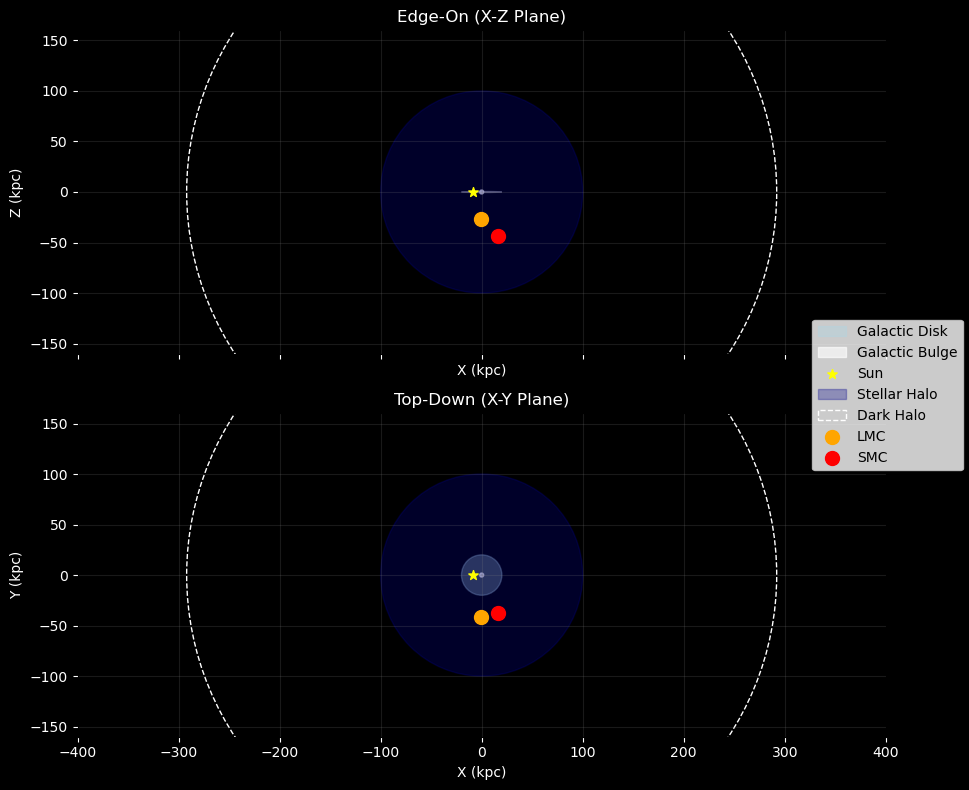

In [87]:
%aimport common

import common

common.do_plot(streams_galactocentric, (clusters_x, clusters_y, clusters_z), streams=False, clusters=False, mag_clouds=True, x_scale=400, yz_scale=160)
